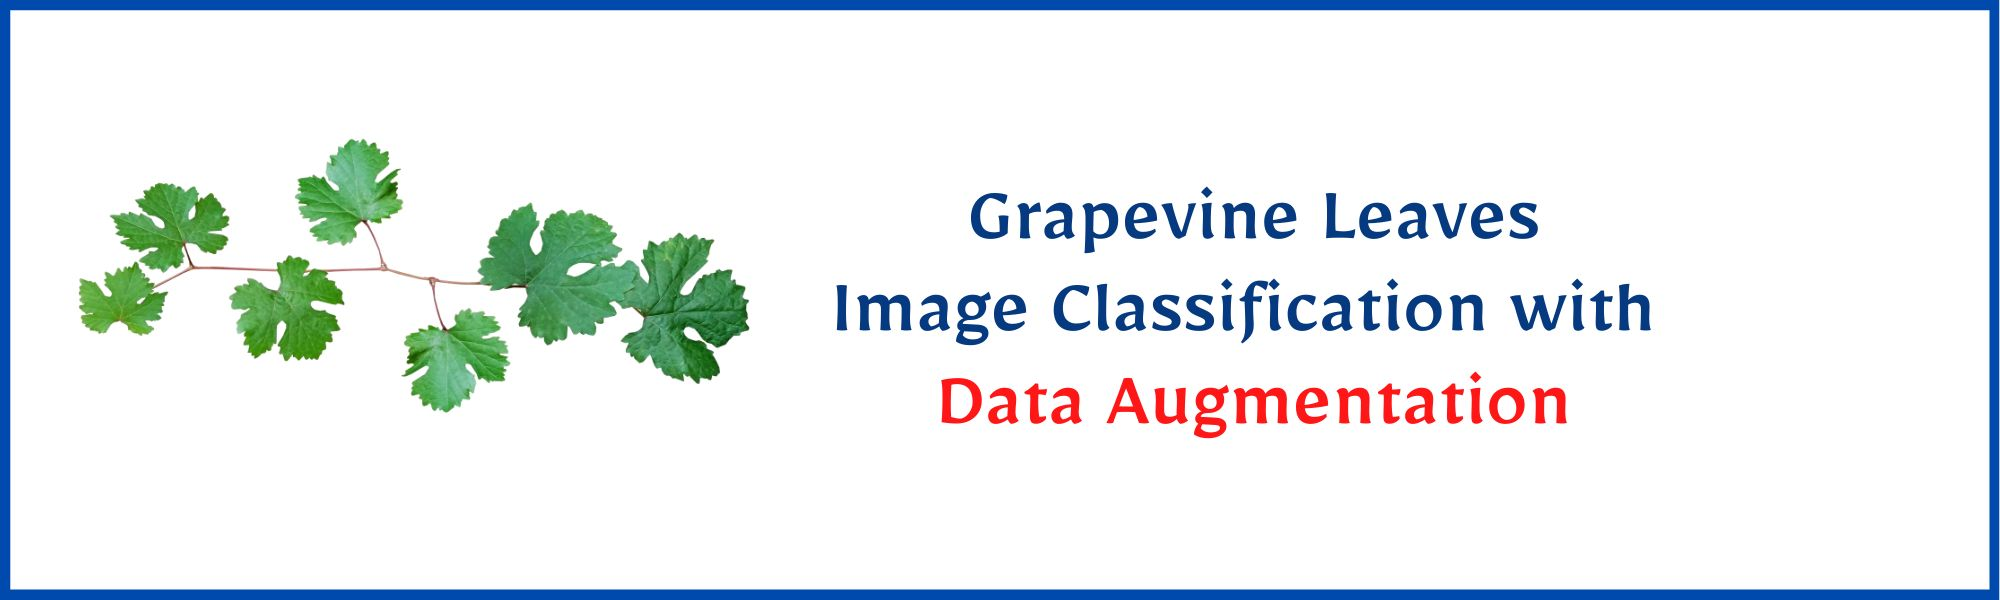

The dataset of Grapevine Leaves contains five classes (Ak, Ala Idris, Büzgülü, Dimnit and Nazli). 

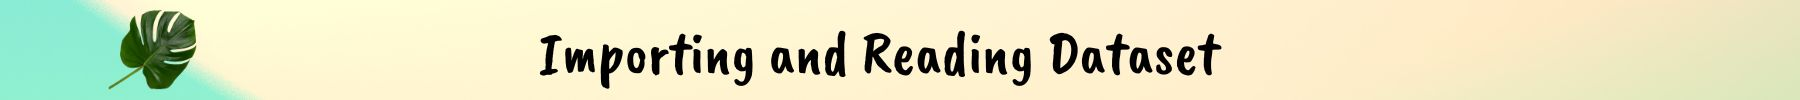

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/API_Credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download muratkokludataset/grapevine-leaves-image-dataset

 98% 106M/109M [00:01<00:00, 120MB/s] 
100% 109M/109M [00:01<00:00, 92.0MB/s]


In [ ]:
! unzip grapevine-leaves-image-dataset.zip

Archive:  grapevine-leaves-image-dataset.zip
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (10).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (100).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (11).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (12).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (13).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (14).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (15).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (16).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (17).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (18).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (19).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (2).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (20).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (21).png  
  inflating: Grapevine_Leaves_Image_Datas

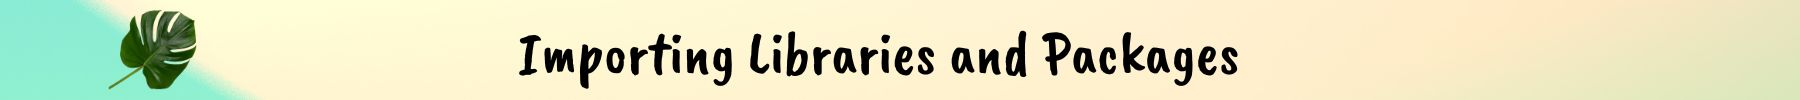

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from pathlib import Path
image_dir = Path('/content/Grapevine_Leaves_Image_Dataset')

In [ ]:
import os
#Counting number of Augmented Images
list1 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/Ak")
list2 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/Ala_Idris")
list3 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/Buzgulu")
list4 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/Dimnit")
list5 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/Nazli")
n1 = len(list1)
n2 = len(list2)
n3 = len(list3)
n4 = len(list4)
n5 = len(list5)

n=n1+n2+n3+n4+n5
print ("Ak :",n1,"\n""Ala_Idris:",n2,"\n""Buzgulu:",n3,"\n""Dimnit:",n4,"\n""Nazli:",n5)
print ("Total Number of Images:",n)

Ak : 100 
Ala_Idris: 100 
Buzgulu: 100 
Dimnit: 100 
Nazli: 100
Total Number of Images: 500


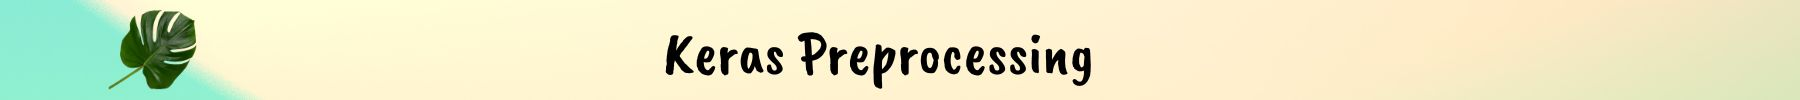

In [ ]:
BATCH_SIZE = 20
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=10

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 500 files belonging to 5 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(20, 224, 224, 3)
[0 3 2 1 2 3 0 3 1 3 4 0 2 4 0 0 0 4 4 0]


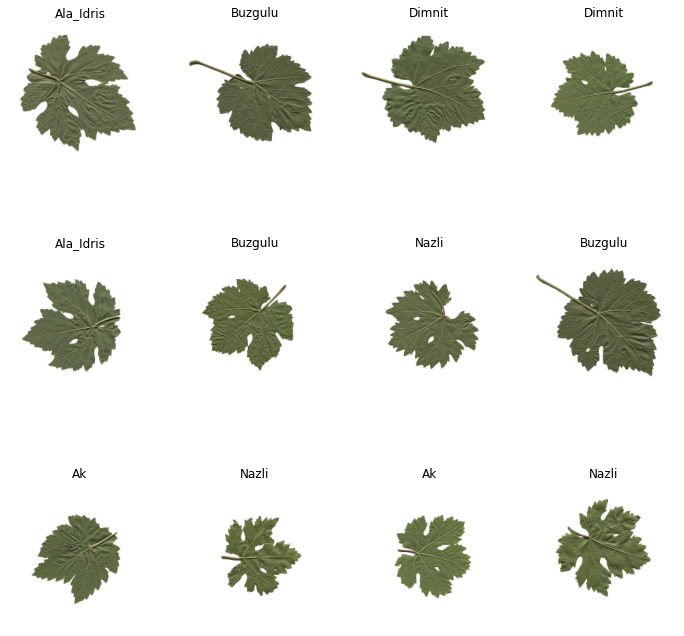

In [ ]:
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)

20

In [ ]:
len(val_ds)

2

In [ ]:
len(test_ds)

3

In [ ]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

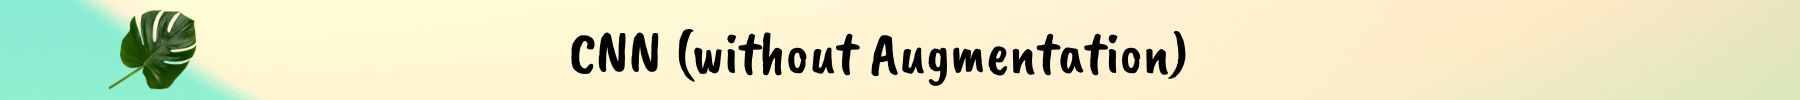

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (20, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (20, 222, 222, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (20, 111, 111, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (20, 109, 109, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (20, 54, 54, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (20, 52, 52, 32)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
20/20 [==============================] - 17s 159ms/step - loss: 1.6348 - accuracy: 0.2175 - val_loss: 1.6066 - val_accuracy: 0.1500
Epoch 2/10
20/20 [==============================] - 1s 47ms/step - loss: 1.6150 - accuracy: 0.2175 - val_loss: 1.6024 - val_accuracy: 0.3000
Epoch 3/10
20/20 [==============================] - 1s 45ms/step - loss: 1.6110 - accuracy: 0.2150 - val_loss: 1.6056 - val_accuracy: 0.2000
Epoch 4/10
20/20 [==============================] - 1s 45ms/step - loss: 1.6092 - accuracy: 0.2300 - val_loss: 1.6048 - val_accuracy: 0.2500
Epoch 5/10
20/20 [==============================] - 1s 47ms/step - loss: 1.6078 - accuracy: 0.2175 - val_loss: 1.5919 - val_accuracy: 0.3250
Epoch 6/10
20/20 [==============================] - 1s 46ms/step - loss: 1.5949 - accuracy: 0.2475 - val_loss: 1.5536 - val_accuracy: 0.4500
Epoch 7/10
20/20 [==============================] - 1s 46ms/step - loss: 1.5206 - accuracy: 0.3550 - val_loss: 1.3445 - val_accuracy: 0.4750
Epoch 8/10


In [ ]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 2s 24ms/step - loss: 1.0382 - accuracy: 0.5667


In [ ]:
model.save("/content/Grapevine_Leaves_Image_Dataset/grapevine_leaf.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

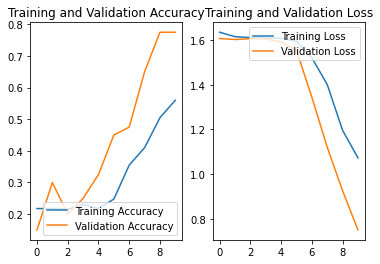

In [ ]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Ak
predicted label: Ak


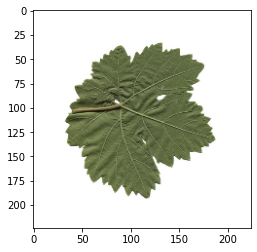

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

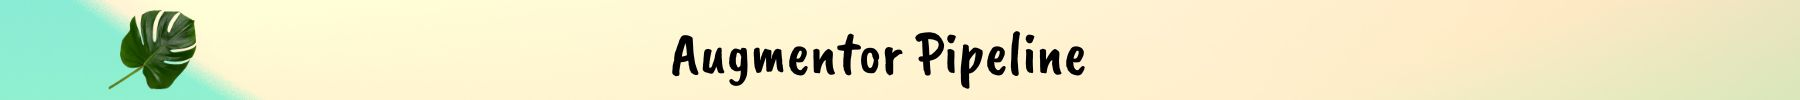

In [ ]:
pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#setting up an Augmentor pipeline

total_images=500*5
import Augmentor
# Passing the path of the image directory 
p = Augmentor.Pipeline(source_directory=image_dir,
                      output_directory="/content/Grapevine_Leaves_Image_Dataset/augmented")
  
# Defining augmentation parameters and generating samples

p.rotate90(probability=0.1)
p.flip_left_right(probability=0.4) 
p.flip_top_bottom(probability=0.8)
p.sample(total_images)

Initialised with 500 image(s) found.
Output directory set to /content/Grapevine_Leaves_Image_Dataset/augmented.

Processing <PIL.Image.Image image mode=RGBA size=511x511 at 0x7F2334290610>: 100%|██████████| 2500/2500 [02:03<00:00, 20.27 Samples/s]


In [ ]:
import os
#Counting number of Augmented Images
list1 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/augmented/Ak")
list2 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/augmented/Ala_Idris")
list3 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/augmented/Buzgulu")
list4 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/augmented/Dimnit")
list5 = os.listdir("/content/Grapevine_Leaves_Image_Dataset/augmented/Nazli")
n1 = len(list1)
n2 = len(list2)
n3 = len(list3)
n4 = len(list4)
n5 = len(list5)

n=n1+n2+n3+n4+n5
print ("Ak :",n1,"\n""Ala_Idris:",n2,"\n""Buzgulu:",n3,"\n""Dimnit:",n4,"\n""Nazli:",n5)
print ("Total Augmented images:",n)

Ak : 495 
Ala_Idris: 490 
Buzgulu: 502 
Dimnit: 498 
Nazli: 515
Total Augmented images: 2500


In [ ]:
#update parameters
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=10

In [ ]:
aug_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Grapevine_Leaves_Image_Dataset/augmented",
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2500 files belonging to 5 classes.


In [ ]:
class_names = aug_dataset.class_names
class_names

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [ ]:
for image_batch, labels_batch in aug_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[2 1 4 2 4 2 4 3 1 4 2 1 2 2 2 2 0 0 0 2 2 1 3 0 3 4 4 0 2 4 3 2]


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds=aug_dataset
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(aug_dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

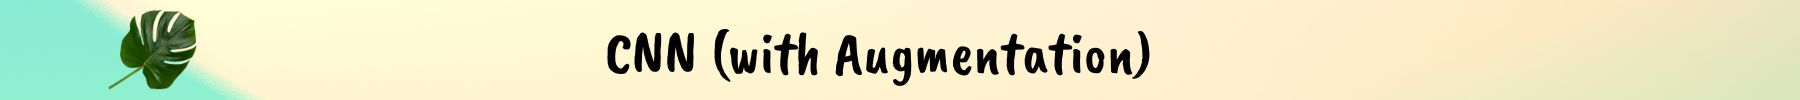

In [ ]:
from tensorflow import keras
model_n = keras.models.load_model('/content/Grapevine_Leaves_Image_Dataset/grapevine_leaf.h5')

In [ ]:
model_n.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history_n = model_n.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
63/63 [==============================] - 33s 295ms/step - loss: 1.4491 - accuracy: 0.3993 - val_loss: 1.1925 - val_accuracy: 0.5223
Epoch 2/10
63/63 [==============================] - 4s 70ms/step - loss: 1.1853 - accuracy: 0.5223 - val_loss: 0.8990 - val_accuracy: 0.6830
Epoch 3/10
63/63 [==============================] - 4s 70ms/step - loss: 0.9460 - accuracy: 0.6429 - val_loss: 0.6707 - val_accuracy: 0.7723
Epoch 4/10
63/63 [==============================] - 4s 70ms/step - loss: 0.7672 - accuracy: 0.7019 - val_loss: 0.5040 - val_accuracy: 0.8170
Epoch 5/10
63/63 [==============================] - 4s 70ms/step - loss: 0.5940 - accuracy: 0.7743 - val_loss: 0.4234 - val_accuracy: 0.8795
Epoch 6/10
63/63 [==============================] - 4s 70ms/step - loss: 0.4909 - accuracy: 0.8194 - val_loss: 0.2976 - val_accuracy: 0.8973
Epoch 7/10
63/63 [==============================] - 4s 70ms/step - loss: 0.4014 - accuracy: 0.8467 - val_loss: 0.2487 - val_accuracy: 0.9375
Epoch 8/10


In [ ]:
scores_n = model_n.evaluate(test_ds)

9/9 [==============================] - 14s 35ms/step - loss: 0.1642 - accuracy: 0.9410


In [ ]:
acc_n = history_n.history['accuracy']
val_acc_n = history_n.history['val_accuracy']

loss_n = history_n.history['loss']
val_loss_n = history_n.history['val_loss']

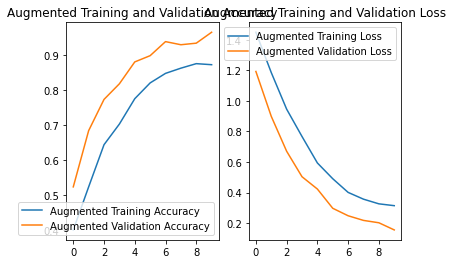

In [ ]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_n, label='Augmented Training Accuracy')
plt.plot(range(EPOCHS), val_acc_n, label='Augmented Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Augmented Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_n, label='Augmented Training Loss')
plt.plot(range(EPOCHS), val_loss_n, label='Augmented Validation Loss')
plt.legend(loc='upper right')
plt.title('Augmented Training and Validation Loss')
plt.show()

first image to predict
actual label: Dimnit
predicted label: Dimnit


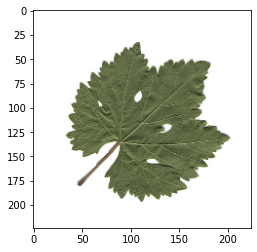

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

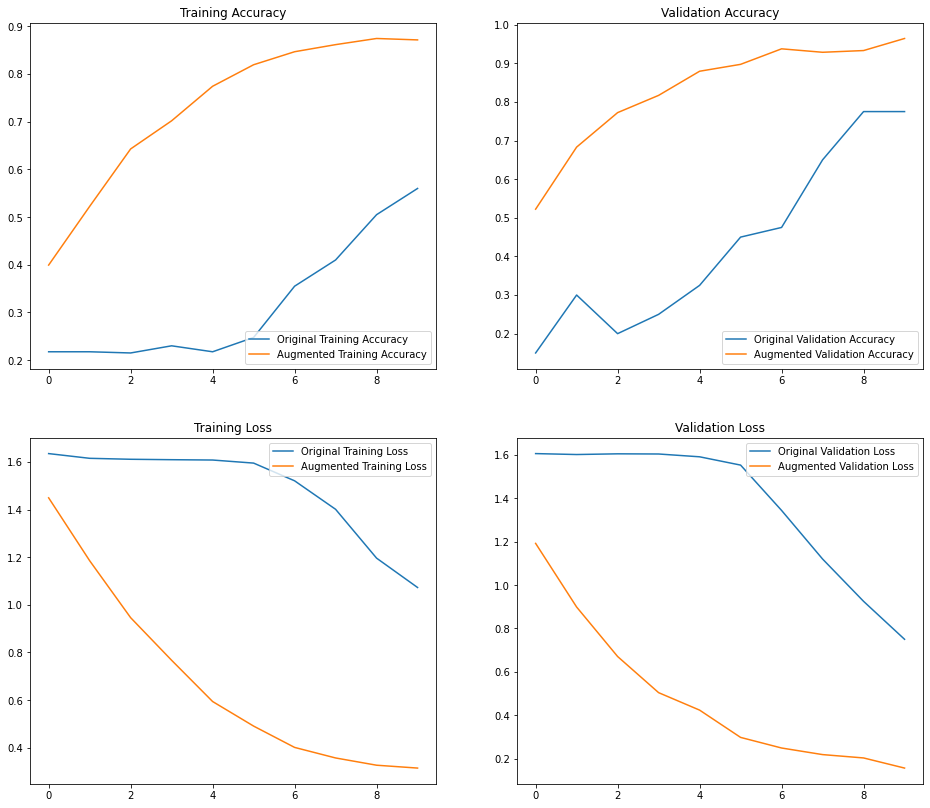

In [ ]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
plt.plot(range(EPOCHS), acc, label='Original Training Accuracy')
plt.plot(range(EPOCHS), acc_n, label='Augmented Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), val_acc, label='Original Validation Accuracy')
plt.plot(range(EPOCHS), val_acc_n, label='Augmented Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(2, 2, 3)
plt.plot(range(EPOCHS), loss, label='Original Training Loss')
plt.plot(range(EPOCHS), loss_n, label='Augmented Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(2, 2, 4)
plt.plot(range(EPOCHS), val_loss, label='Original Validation Loss')
plt.plot(range(EPOCHS), val_loss_n, label='Augmented Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()

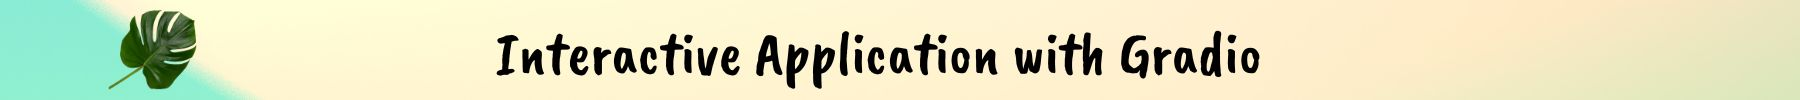

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 15.0 MB/s 
     |████████████████████████████████| 2.3 MB 50.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.1 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 140 kB 67.4 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 212 kB 73.2 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 272 kB 69.5 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 69.4 MB/s 
     |████████████████████████████████| 271 kB 72.8 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB

In [ ]:
def predict_input_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model_n.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=5)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [ ]:
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://23287.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
